In [36]:
import numpy as np
import pandas as pd

In [166]:
# reading the loan data
loan_data = pd.read_csv('loan.csv')
loan_data.head()

/Users/wal/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [55]:
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [56]:
loan_data.shape

(39717, 111)

In [167]:
# get the column which has more than 30 percent of data as null 
null_columns = loan_data.isnull().mean()*100
null_columns = list(null_columns[null_columns.values>30].index)
null_columns


['desc',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_pa

In [168]:
# remove the null columns
loan_data = loan_data.drop(null_columns, axis=1)
loan_data.shape

(39717, 53)

In [169]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


### will check which has lower percentage of null column values and replace it with some values depending upon conditions

In [88]:
#check for columns with percentage of null value
loan_data.isnull().sum()/len(loan_data)*100

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [170]:
# we can drop the customer behviour columns as customer behavior is not present during the time of loan application
# also will be removing the data which are not required for analysis
behaviour_array = ['last_credit_pull_d', 'earliest_cr_line', 'inq_last_6mths' ,'open_acc','pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt','last_credit_pull_d','application_type','emp_title','url','delinq_amnt','acc_now_delinq','policy_code','pymnt_plan','tax_liens','pub_rec_bankruptcies', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med']
loan_data = loan_data.drop(behaviour_array, axis=1)
loan_data.shape

(39717, 25)

In [171]:
loan_data.isnull().sum()

id                        0
member_id                 0
loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
title                    11
zip_code                  0
addr_state                0
dti                       0
delinq_2yrs               0
initial_list_status       0
total_pymnt               0
total_pymnt_inv           0
dtype: int64

In [119]:
loan_data['emp_length'].value_counts()


10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [172]:
loan_data['emp_length'] = loan_data['emp_length'].fillna('10+ years')
# loan_data['emp_length'].value_counts()

In [140]:
loan_data.isnull().sum()

id                      0
member_id               0
loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
pymnt_plan              0
url                     0
purpose                 0
title                  11
zip_code                0
addr_state              0
dti                     0
delinq_2yrs             0
initial_list_status     0
total_pymnt             0
total_pymnt_inv         0
policy_code             0
acc_now_delinq          0
delinq_amnt             0
dtype: int64

In [173]:
loan_data['verification_status'].value_counts()

Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64

In [174]:
loan_data['title'] = loan_data['title'].fillna('Debt Consolidation')

In [193]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'initial_list_status', 'total_pymnt', 'total_pymnt_inv'],
      dtype='object')

## Univariate analysis for categories

In [223]:
import matplotlib.pyplot as plt
import seaborn as sns

In [298]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
#     plt.rcParams["axes.labelsize"] = 20
#     plt.rcParams['axes.titlesize'] = 22
#     plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 2*len(temp.unique())
    fig.set_size_inches(width , 3)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='magma') 
        
    plt.show()

/var/folders/wz/6jc5f9sn7zx0bxfwc0v2jw7c0000gn/T/ipykernel_89094/2567607001.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  temp = pd.Series(data = hue)


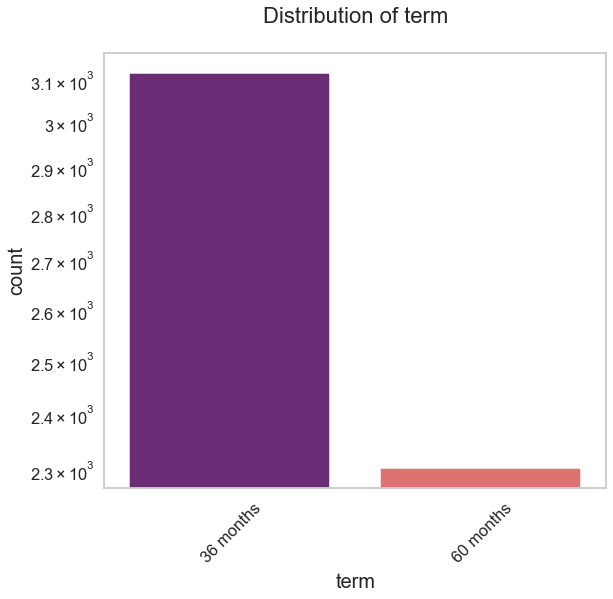

In [267]:
# PLotting for term

uniplot(loan_data[loan_data['loan_status']=='Charged Off'],col='term',title='Distribution of term',hue =None)

Points to be concluded from the above graph:

1.People take loan for fewer months as compared to higher months

/var/folders/wz/6jc5f9sn7zx0bxfwc0v2jw7c0000gn/T/ipykernel_89094/2345975913.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  temp = pd.Series(data = hue)


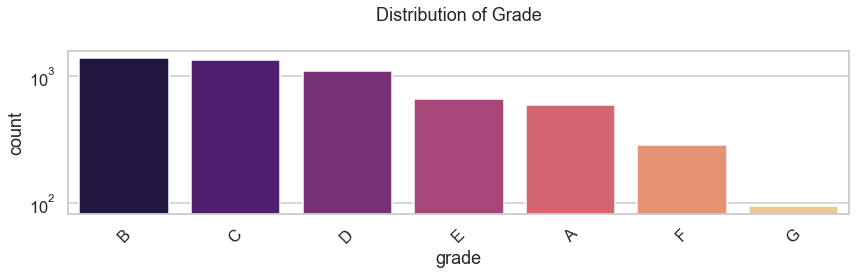

In [299]:
# Potting for grade

uniplot(loan_data[loan_data['loan_status']=='Charged Off'],col='grade',title='Distribution of Grade',hue =None)

Points to be concluded from the above graph:

1.People from grade B take more than others
2.People from grade G take very less loan

/var/folders/wz/6jc5f9sn7zx0bxfwc0v2jw7c0000gn/T/ipykernel_89094/2567607001.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  temp = pd.Series(data = hue)


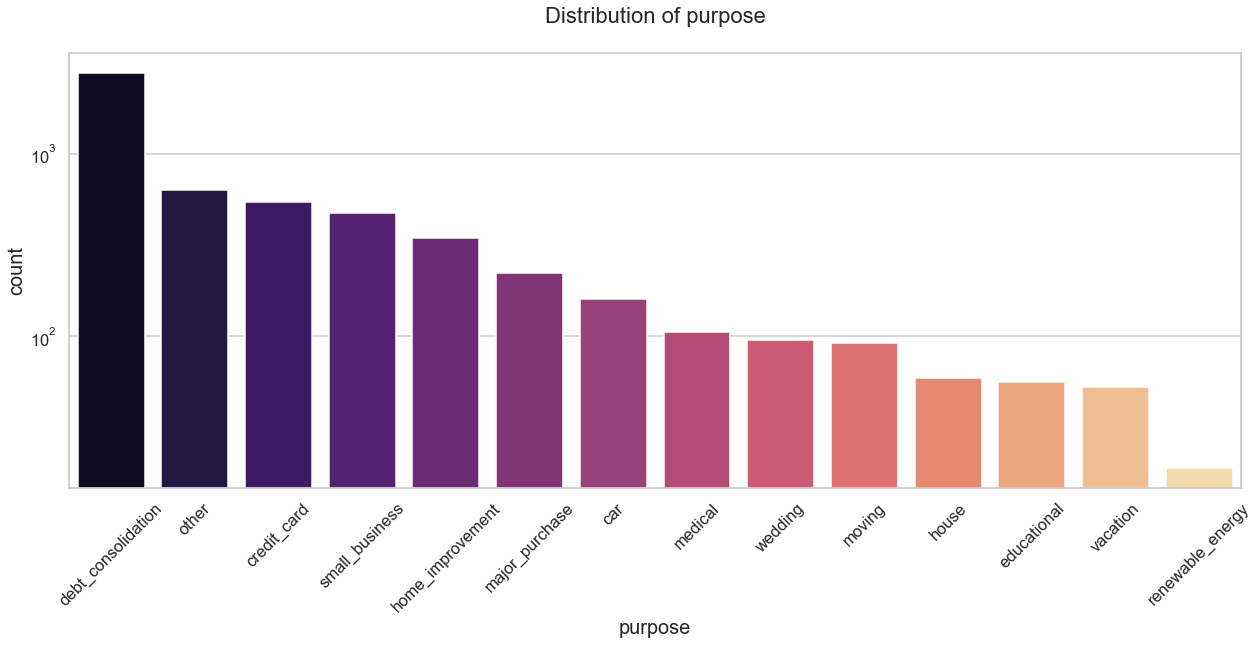

In [255]:
# Plotting for purpose

uniplot(loan_data[loan_data['loan_status']=='Charged Off'],col='purpose',title='Distribution of purpose',hue =None)

Points to be concluded from the above graph:

1.Most of the people take loan for debt consolidation
2.People take least loan for renewable energy

/var/folders/wz/6jc5f9sn7zx0bxfwc0v2jw7c0000gn/T/ipykernel_89094/2345975913.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  temp = pd.Series(data = hue)


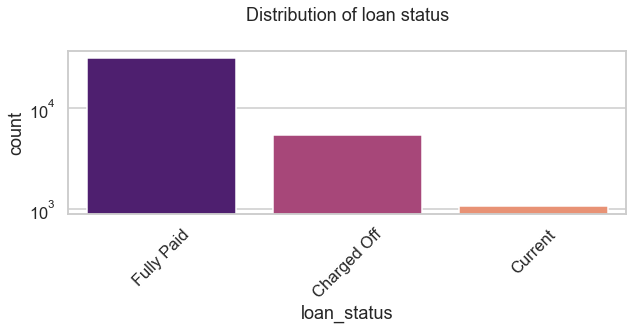

In [300]:
# PLotting for loan status

uniplot(loan_data,col='loan_status',title='Distribution of loan status',hue =None)

In [274]:
loan_data.iloc[0]

id                         1077501
member_id                  1296599
loan_amnt                     5000
funded_amnt                   5000
funded_amnt_inv             4975.0
term                     36 months
int_rate                     10.65
installment                 162.87
grade                            B
sub_grade                       B2
emp_length               10+ years
home_ownership                RENT
annual_inc                 24000.0
verification_status       Verified
issue_d                     Dec-11
loan_status             Fully Paid
purpose                credit_card
title                     Computer
zip_code                     860xx
addr_state                      AZ
dti                             28
delinq_2yrs                      0
initial_list_status              f
total_pymnt            5863.155187
total_pymnt_inv            5833.84
annual_inc_groups            0-30k
int_rate_groups             5%-10%
Name: 0, dtype: object

/var/folders/wz/6jc5f9sn7zx0bxfwc0v2jw7c0000gn/T/ipykernel_89094/2567607001.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  temp = pd.Series(data = hue)


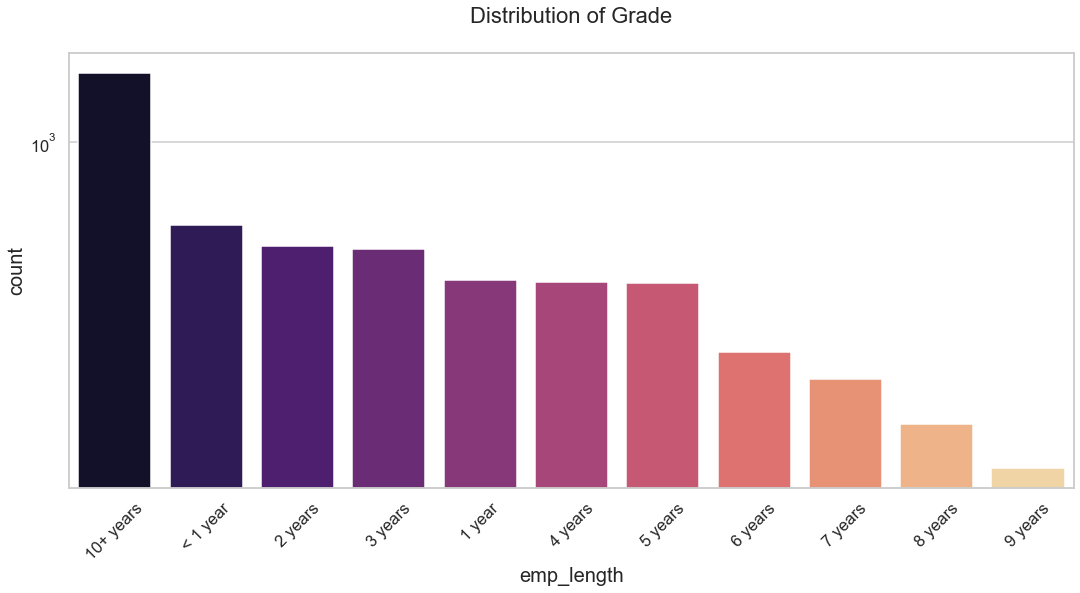

In [270]:
uniplot(loan_data[loan_data['loan_status']=='Charged Off'],col='emp_length',title='Distribution of employe length',hue =None)

In [302]:
# creating bin for int_rate
# loan_data.int_rate = pd.to_numeric(loan_data.int_rate.apply(lambda x : x.split('%')[0]))
loan_data['int_rate_groups'] = pd.cut(loan_data['int_rate'], bins=5,precision =0,labels=['1%-5%','5%-10%','10%-15%','15%-20%','20%-25%'])


/var/folders/wz/6jc5f9sn7zx0bxfwc0v2jw7c0000gn/T/ipykernel_89094/689537390.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['int_rate_groups'] = pd.cut(loan_data['int_rate'], bins=5,precision =0,labels=['1%-5%','5%-10%','10%-15%','15%-20%','20%-25%'])


/var/folders/wz/6jc5f9sn7zx0bxfwc0v2jw7c0000gn/T/ipykernel_89094/2567607001.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  temp = pd.Series(data = hue)


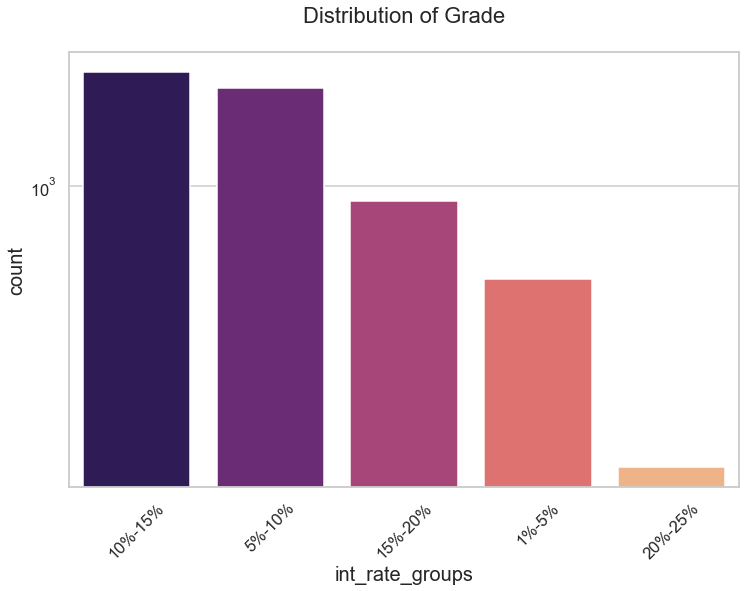

In [273]:
uniplot(loan_data[loan_data['loan_status']=='Charged Off'],col='int_rate_groups',title='Distribution of Grade',hue =None)

In [250]:
loan_data['home_ownership'].value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [251]:
#replacing 'NONE' with 'OTHERS'
loan_data['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

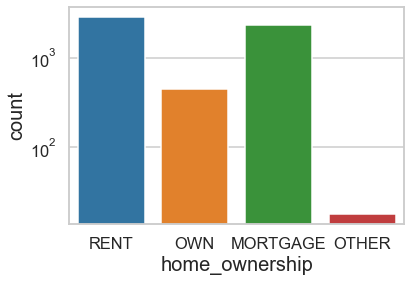

In [252]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loan_data[loan_data['loan_status']=='Charged Off'])

## Univariate analysis for numeric 

/Users/wal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_inc'>

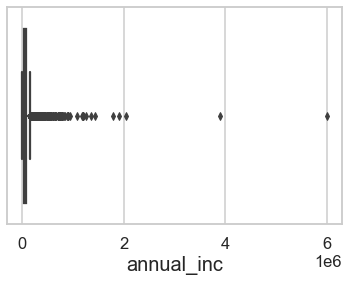

In [257]:
sns.boxplot(loan_data['annual_inc'])

/Users/wal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_inc'>

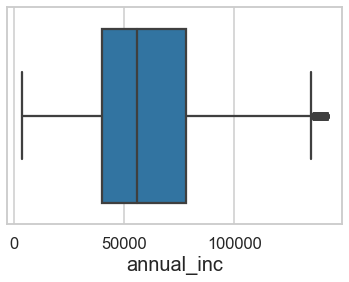

In [260]:
# there are some outliers in salary, will remove them

loan_data = loan_data[loan_data.annual_inc <= (loan_data['annual_inc'].quantile(0.95))]
sns.boxplot(loan_data['annual_inc'])

In [261]:
# creating bins for annual income
loan_data['annual_inc_groups'] = pd.cut(loan_data['annual_inc'], bins=5,precision =0,labels =['0-30k','30k-60k','60k-90k','90k-120k','120k-150k'])


/var/folders/wz/6jc5f9sn7zx0bxfwc0v2jw7c0000gn/T/ipykernel_89094/4106552765.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['annual_inc_groups'] = pd.cut(loan_data['annual_inc'], bins=5,precision =0,labels =['0-30k','30k-60k','60k-90k','90k-120k','120k-150k'])


/var/folders/wz/6jc5f9sn7zx0bxfwc0v2jw7c0000gn/T/ipykernel_89094/2567607001.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  temp = pd.Series(data = hue)


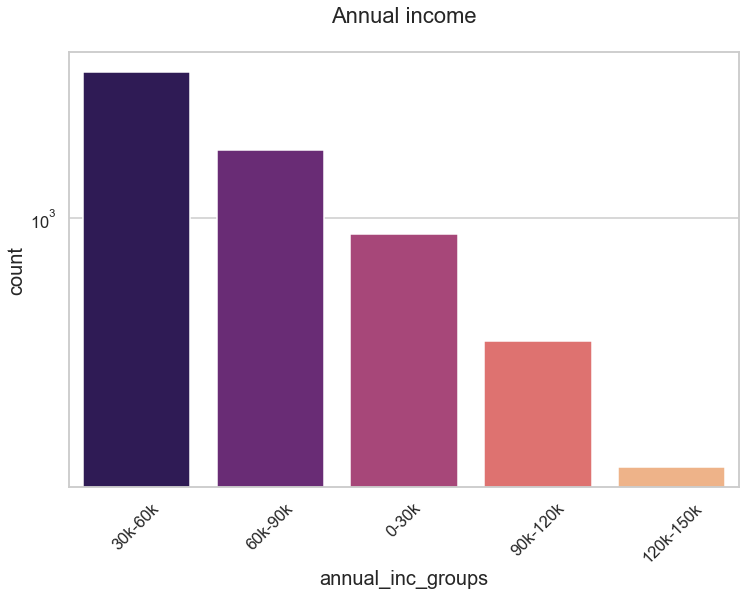

In [263]:
uniplot(loan_data[loan_data['loan_status']=='Charged Off'],col='annual_inc_groups',title='Annual income',hue =None)

#### Annual icome range for 30k-60k tend to default more

In [256]:
loan_data['annual_inc'].value_counts()

60000.0    1505
50000.0    1057
40000.0     876
45000.0     830
30000.0     825
           ... 
56820.0       1
45314.0       1
53913.0       1
62880.0       1
27376.0       1
Name: annual_inc, Length: 5318, dtype: int64

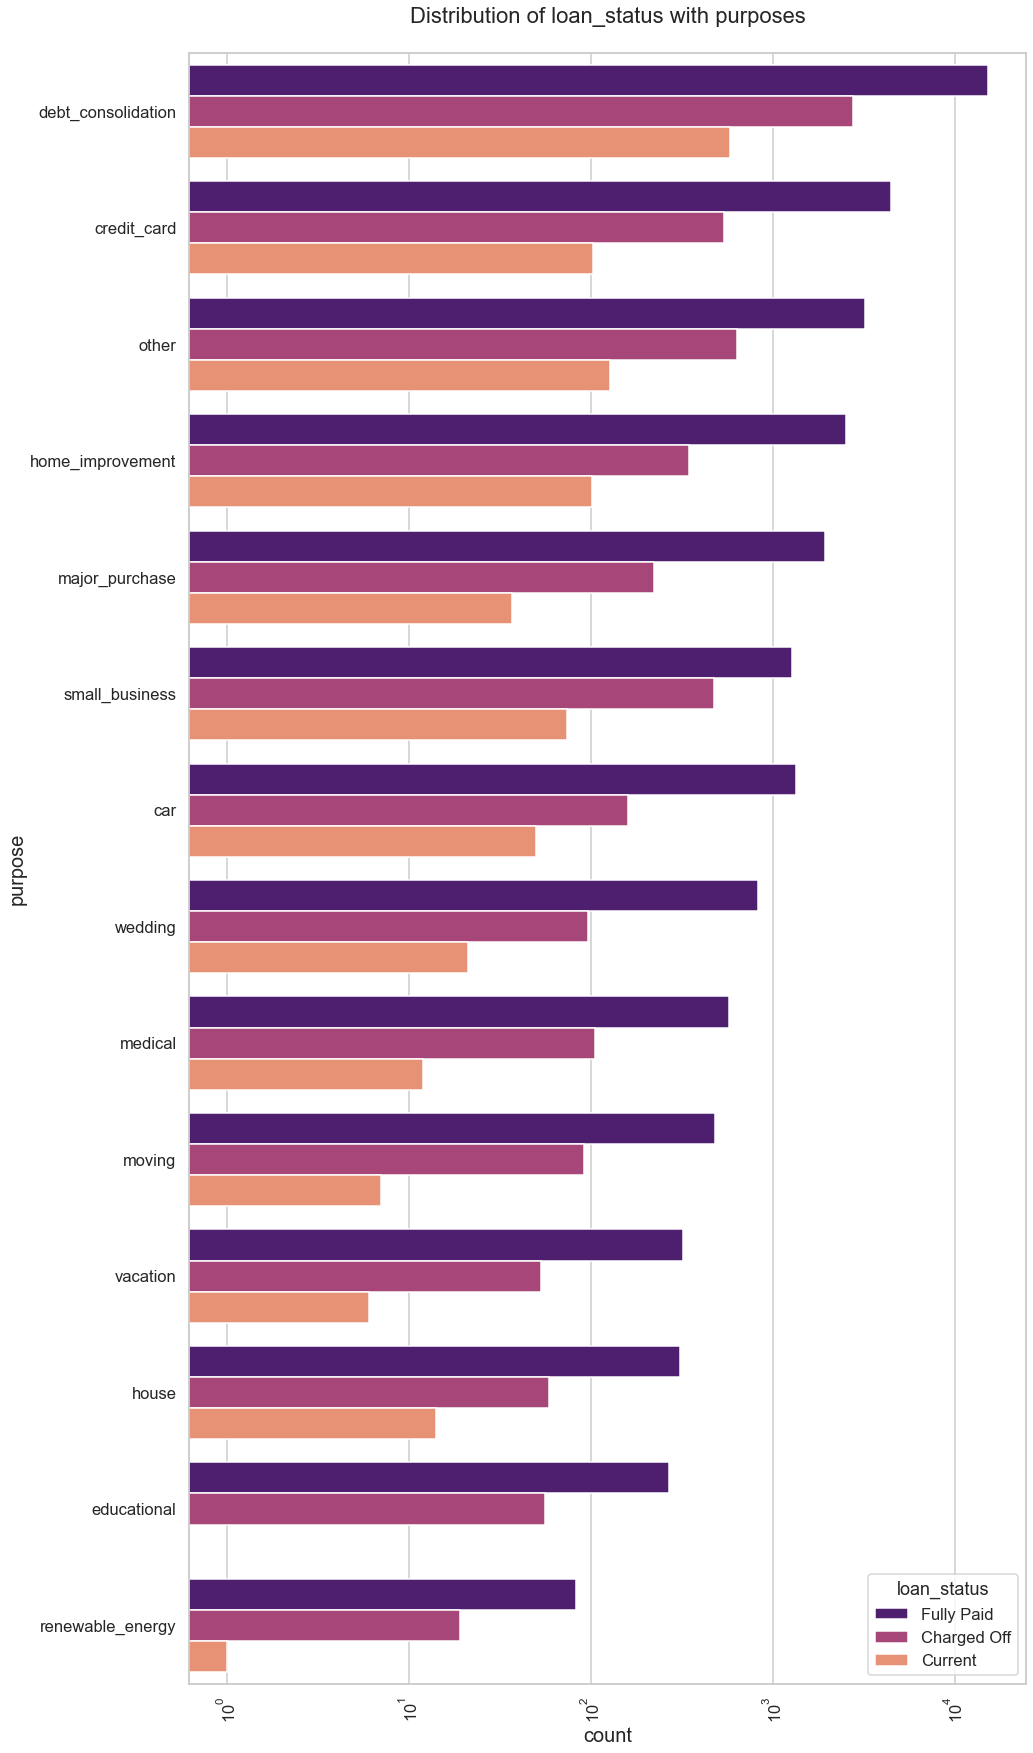

In [239]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale
# Distribution of loan status in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of loan_status with purposes')
ax = sns.countplot(data = loan_data, y= 'purpose', 
                   order=loan_data['purpose'].value_counts().index,hue = 'loan_status',palette='magma') 

People who buy a loan for debt consolidation tend to default more than anyone else

In [241]:
loan_data['dti'] = loan_data['dti'].round().astype(int)
loan_data['dti'].value_counts()

14    2081
13    2022
15    1983
11    1930
16    1915
12    1909
10    1887
17    1816
18    1792
9     1789
8     1738
20    1710
19    1702
21    1510
7     1496
22    1467
6     1452
23    1312
5     1302
4     1185
24    1156
3      975
2      970
1      854
25     644
0      531
26     161
27     141
28     134
29     116
30      37
Name: dti, dtype: int64

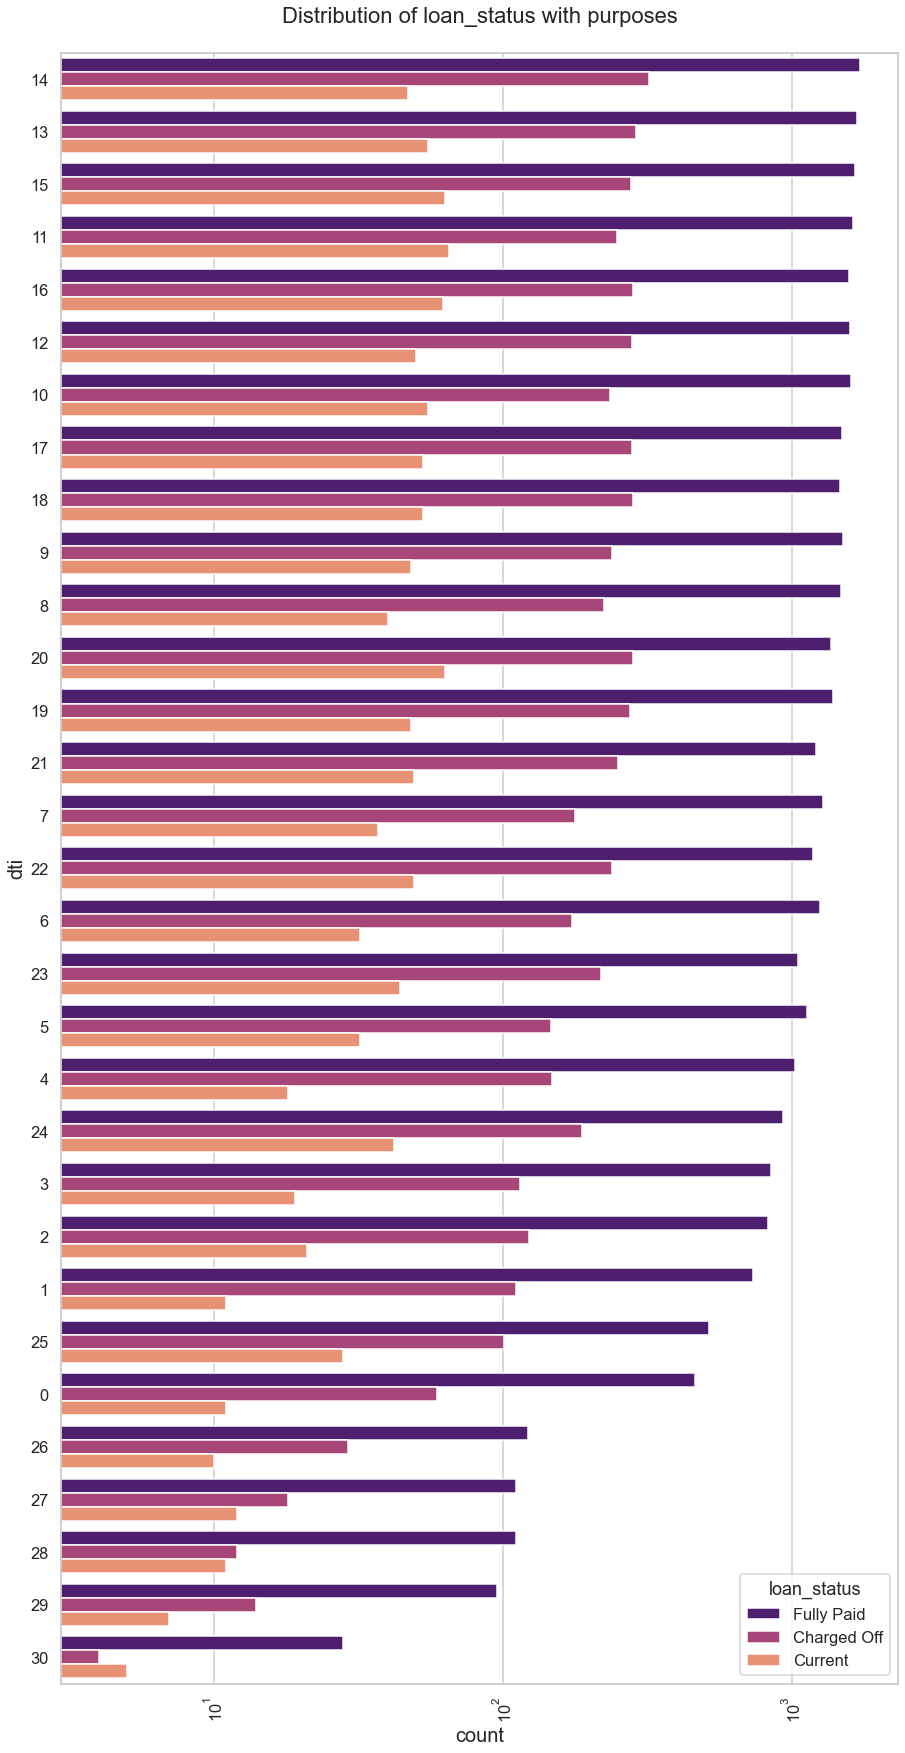

In [242]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale
# Distribution of loan status in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of loan_status with purposes')
ax = sns.countplot(data = loan_data, y= 'dti', 
                   order=loan_data['dti'].value_counts().index,hue = 'loan_status',palette='magma') 

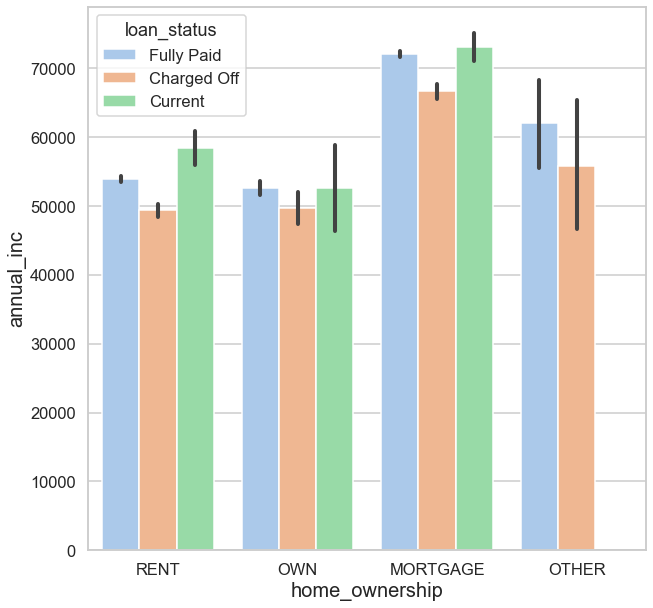

In [275]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

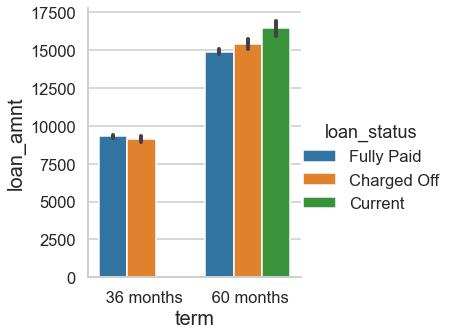

In [276]:
sns.catplot(x = 'term', y = 'loan_amnt', data = loan_data,hue = 'loan_status', kind = 'bar')


In [286]:
loan_data.iloc[0]

id                         1077501
member_id                  1296599
loan_amnt                     5000
funded_amnt                   5000
funded_amnt_inv             4975.0
term                     36 months
int_rate                     10.65
installment                 162.87
grade                            B
sub_grade                       B2
emp_length               10+ years
home_ownership                RENT
annual_inc                 24000.0
verification_status       Verified
issue_d                     Dec-11
loan_status             Fully Paid
purpose                credit_card
title                     Computer
zip_code                     860xx
addr_state                      AZ
dti                             28
delinq_2yrs                      0
initial_list_status              f
total_pymnt            5863.155187
total_pymnt_inv            5833.84
annual_inc_groups            0-30k
int_rate_groups             5%-10%
loan_amnt_groups             0-10k
Name: 0, dtype: obje

In [281]:
loan_data['loan_amnt_groups'] = pd.cut(loan_data['loan_amnt'], bins=4,precision =0,labels=['0-10k','10k-20k','20k-30k','30k-40k'])


/var/folders/wz/6jc5f9sn7zx0bxfwc0v2jw7c0000gn/T/ipykernel_89094/953212233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['loan_amnt_groups'] = pd.cut(loan_data['loan_amnt'], bins=4,precision =0,labels=['0-10k','10k-20k','20k-30k','30k-40k'])


<AxesSubplot:xlabel='loan_amnt_groups', ylabel='int_rate'>

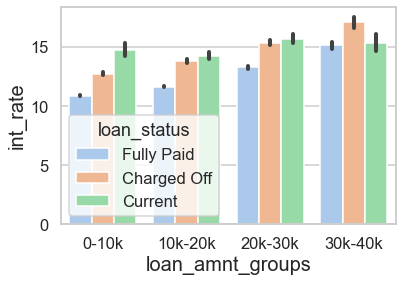

In [289]:
sns.barplot(data =loan_data,x='loan_amnt_groups', y='int_rate', hue ='loan_status',palette="pastel")


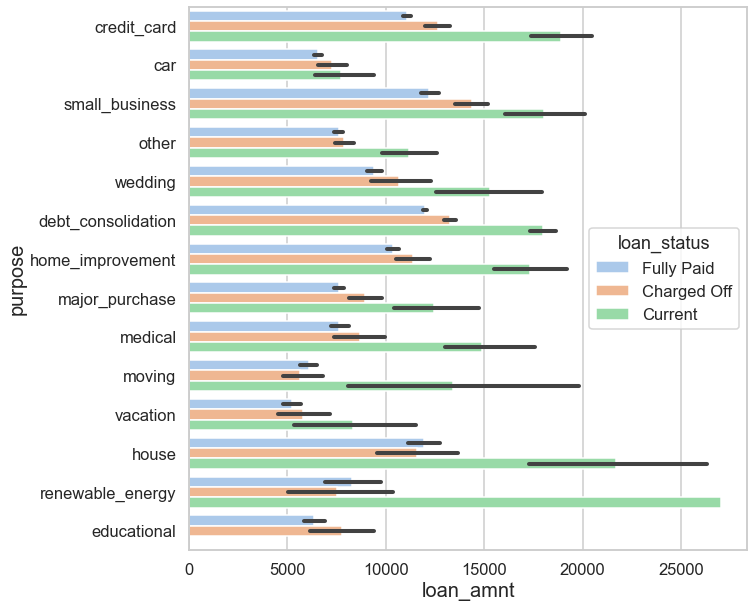

In [291]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt', y='purpose', hue ='loan_status',palette="pastel")
plt.show()

# Observations

### On the basis of univariant and bivariant analysis  following are observations which are going to default

In [ ]:
1. Those who taken the loan for short term tend to default more
2. Those belong to grade B take defaults more
3. Those who take loan for debt consolidation tend to default more
4. People who are on rent and mortgage tend to default more
5. People with income range of 30k-60k tend to default more
6. Those who have employe length greater than 10+ , default more
7. For the interest range between 10 to 15 tend to default more
8. People whose home ownership is 'MORTGAGE and have income of 60-70k, default more
9. People with loan amount greater than 10000 and having term more than 60 months tend to default more
10. People who receive interest at the rate of more than 15% and have an income of 30k-40k
11. People with small business and  amount greater than 10000 tend to default more